In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv('placement.csv')
df

,Cgpa,IQ,placement
0,8.5,115,1
1,7.2,98,1
2,6.1,105,0
3,9.3,122,1
4,5.8,88,0
...,...,...,...
91,9.2,124,1
92,5.5,80,0
93,8.3,118,1
94,6.5,93,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Cgpa       96 non-null     float64
 1   IQ         96 non-null     int64  
 2   placement  96 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 2.4 KB


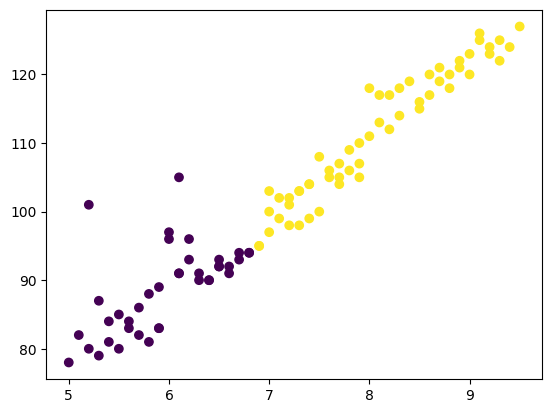

In [14]:
plt.scatter(df['Cgpa'],df['IQ'],c=df['placement'])

In [22]:
# Independant entities
x = df.iloc[:,0:2] # form all colums i want 0,1 column
x

,Cgpa,IQ
0,8.5,115
1,7.2,98
2,6.1,105
3,9.3,122
4,5.8,88
...,...,...
91,9.2,124
92,5.5,80
93,8.3,118
94,6.5,93


In [23]:
# dependant entity
y = df.iloc[:,-1]
y

0     1
1     1
2     0
3     1
4     0
     ..
91    1
92    0
93    1
94    0
95    1
Name: placement, Length: 96, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.1)

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [29]:
xtrain = sc.fit_transform(xtrain)
xtrain

array([[ 0.36570382,  0.19537804],
       [-0.75182765, -0.79717536],
       [-1.47024073, -1.29345206],
       [-0.59218029, -0.65538202],
       [-0.911475  , -0.79717536],
       [-1.55006441, -1.08076205],
       [ 0.92446955,  1.18793143],
       [-0.19306191,  0.05358469],
       [-0.35270927, -0.58448535],
       [ 0.12623279, -0.23000199],
       [ 1.64288264,  1.61331146],
       [ 0.52535117,  0.54986139],
       [ 1.00429323,  0.90434475],
       [ 0.04640911,  0.05358469],
       [ 0.04640911,  0.05358469],
       [ 1.0841169 ,  1.2588281 ],
       [ 0.52535117,  0.33717138],
       [-0.03341456, -0.30089866],
       [ 1.64288264,  1.40062145],
       [ 0.44552749,  0.47896472],
       [-0.83165132, -0.65538202],
       [-1.47024073, -1.50614207],
       [ 0.28588014,  0.19537804],
       [ 1.48323528,  1.61331146],
       [-0.67200397, -0.86807203],
       [-0.03341456, -0.01731198],
       [ 0.20605647,  0.40806805],
       [ 1.40341161,  1.47151812],
       [ 1.80252999,

In [30]:
xtest = sc.fit_transform(xtest)
xtest

array([[-0.87235674,  0.3739788 ],
       [ 0.61461498,  0.4674735 ],
       [ 0.81287788,  0.4674735 ],
       [ 1.30853512,  1.21543109],
       [-0.47583095, -0.84145229],
       [ 0.51548353, -0.0934947 ],
       [-0.47583095, -0.84145229],
       [-0.97148819, -0.3739788 ],
       [-1.76453978, -1.96338868],
       [ 1.30853512,  1.58940988]])

In [31]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [32]:
# train the model
LR.fit(xtrain,ytrain)

LogisticRegression()

In [35]:
y_pred = LR.predict(xtest)
y_pred

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 1])

In [36]:
ytest

2     0
35    1
75    1
43    1
54    0
76    1
6     0
36    0
52    0
93    1
Name: placement, dtype: int64

To find the accurcy score

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(ytest,y_pred)

0.9

90% time the model gives the right output

<Axes: >

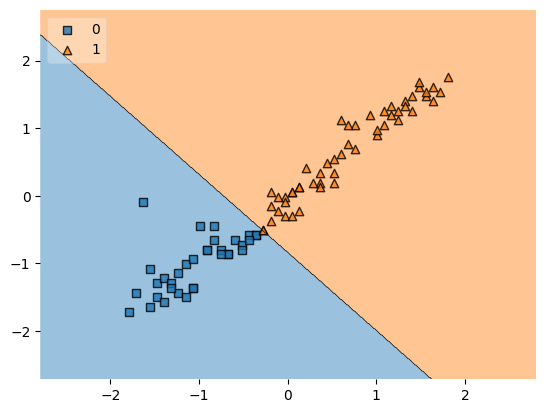

In [40]:
from mlxtend.plotting import plot_decision_regions
# ytrain.values to get th values in array
# cl(classifier) => LR
plot_decision_regions(xtrain,ytrain.values,legend=2,clf=LR)

#### This is decision boundry based on which  the model can predict the outcomes

In [41]:
import pickle

python obj converted into model file
in the model.pkl file

wb => write binary

In [43]:
pickle.dump(LR,open('model.pkl','wb'))